In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
birth = pd.read_csv('subsampled_clean_data.csv')

In [3]:
birth.head()

,Unnamed: 0,ATTEND,BFACIL,BMI,DBWT,DMAR,FAGECOMB,FEDUC,FRACE6,LD_INDL,...,PRIORLIVE,PRIORTERM,RDMETH_REC,RESTATUS,RF_CESAR,SEX,PREG_LEN,WTGAIN_PER,CIG,FIRST_BIRTH
0,2780164,1,1,31.4,3670,1,29,6,1,N,...,False,False,1,2,N,M,9,0.000000,False,True
1,1306496,2,1,27.6,3494,1,34,4,1,Y,...,True,False,1,1,N,F,9,0.120482,False,False
2,3027006,1,1,27.1,3374,2,43,2,1,N,...,True,True,1,1,N,M,10,0.061350,True,False
3,903600,1,1,26.8,3520,1,30,3,1,Y,...,False,True,1,1,N,M,9,0.301282,False,True
4,2813944,1,1,21.3,3140,1,30,5,1,N,...,False,False,1,3,N,M,9,0.208333,False,True


Tasks:
1.  Visualize at least two quantitative variables and two categorical variables. Your visualizations must be relevant to your research questions!
2.  Describe any trends you observe, and any relationships you may want to follow up on.
3. Describe any data cleaning steps you took. How will these decisions impact your models and
inferences? (This is in preprocessing.ipynb)
4.  Explain how your visualizations should be relevant to your research questions: either by motivating the question, or suggesting a potential answer. You must explain why they are relevant.

# Quantitative Variables

## Birth Weight – Detail in Grams (DBWT)

Text(0.5, 1.0, 'Histogram of Birth Weight-Detail in Grams')

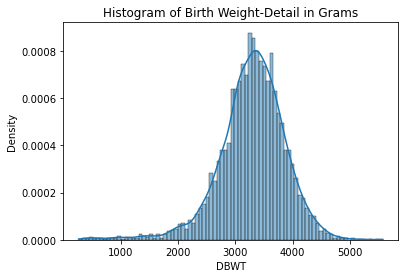

In [4]:
sns.histplot(birth['DBWT'], stat = 'density', kde = True)
plt.title("Histogram of Birth Weight-Detail in Grams")

In [5]:
#Mean
np.mean(birth['DBWT'])

3291.9113

In [6]:
#SD
np.std(birth['DBWT'])

578.2338821206437

In [7]:
#min and max
np.min(birth['DBWT']), np.max(birth['DBWT'])

(269, 5570)

From the histogram above, we see that the birth weight is rougly normally distributed with mean = 3292 and standard deviation = 578. We can see that it is slightly skewed to the left, with minimum weight at 269; this is an interesting trend that we can follow up in order to answer our first research question ("Does smoking cause lower birth weights?"). Our second research question ("Predicting a baby's birth weight from Mother’s Single Years of Age and Number of Prenatal Visits, comparing GLMs to nonparametric methods.") is attempting to predict birth weight, so we can use this histogram to help us perform model checking.

## Mother’s Single Years of Age (MAGER)

Text(0.5, 1.0, "Histogram of Mother's Single Years of Age")

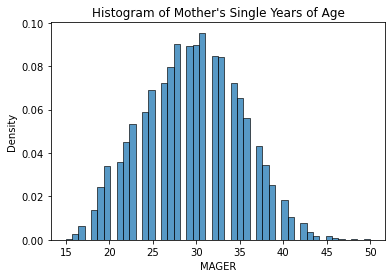

In [8]:
sns.histplot(birth['MAGER'], stat = 'density')
plt.title("Histogram of Mother's Single Years of Age")

In [9]:
#Mean
np.mean(birth['MAGER'])

29.5224

In [10]:
#SD
np.std(birth['MAGER'])

5.5782164031166985

In [11]:
#min and max
np.min(birth['MAGER']), np.max(birth['MAGER'])

(15, 50)

From the histogram above, we see that the mother's age is rougly normally distributed as well with mean around 19.5 and standard deviation around 5.6. We can see that it is slightly skewed to the right, with maximum age at 50; this is an interesting trend that we can follow up for our second research question ("Predicting a baby's birth weight from Mother’s Single Years of Age and Number of Prenatal Visits, comparing GLMs to nonparametric methods."). We can use this to help us answer if older mother is likely to have babies with lighter birth weights.

# Categorical Variables

## Smoking or Not (CIG)

Text(0.5, 1.0, 'Bar Chart of Whether a Mother Smokes or Not')

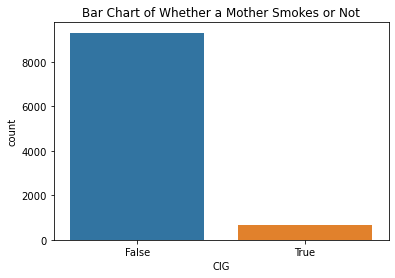

In [15]:
sns.countplot(x = birth['CIG'])
plt.title("Bar Chart of Whether a Mother Smokes or Not")

In [18]:
#Number of Smokers
np.sum(birth['CIG'] == 1)

682

In [19]:
#Number of Non-smokers
np.sum(birth['CIG'] == 0)

9318

From the Bar Chart above, we can see that much more mothers don't smoke comparing with number of mothers who smoke: there are 682 smokers and 9318 non-smokers. This will help us to answer our first research question("Does smoking cause lower birth weights?"), since we see from this plot that we need to take into consideration that the number of smokers and number of non-smokers are not balanced.

## First Birth(FIRST_BIRTH)

Text(0.5, 1.0, 'Bar Chart of if this Baby is First Birth')

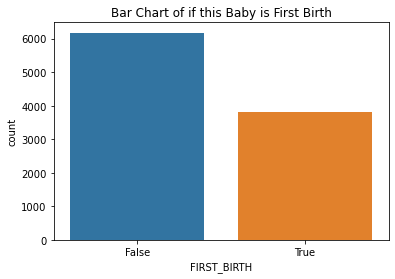

In [20]:
sns.countplot(x = birth['FIRST_BIRTH'])
plt.title("Bar Chart of if this Baby is First Birth")

In [21]:
#Number of First Birth
np.sum(birth['FIRST_BIRTH'] == 1)

3823

In [22]:
#Number of None First Birth
np.sum(birth['FIRST_BIRTH'] == 0)

6177

From the Bar Chart above, we can see a bit more non-first birth than first birth: there are 3823 first-births and 6177 non-first births. This motivates us to include this feature in helping us to predict baby's birth weight for our second research question. 